In [103]:
# Clone course repository automatically
!git clone https://github.com/ddribes/Evolution_of_AI.git
%cd Evolution_of_AI/notebooks

Cloning into 'Evolution_of_AI'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 84 (delta 30), reused 29 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 2.44 MiB | 11.77 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/Evolution_of_AI/notebooks/Evolution_of_AI/notebooks/Evolution_of_AI/notebooks


<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">Analyzing a Machine Learning Model</h1>
<hr style="border-width:2px;border-color:#75DFC1">

> In the vast world of Machine Learning, there are many ways to improve standard models. Whether by refining the data or adjusting the models themselves, the optimization options are numerous: feature engineering, hyperparameter tuning, choosing the right loss function, etc. These concepts are essential for any data scientist who wants to build robust and effective models. Tools such as GridSearch are fundamental for optimizing this process and developing the best possible model.
>
> Most practitioners follow these steps—using cross-validation or a train/test split—and iterate until they reach a good metric score. This approach is not wrong; it often leads to high-quality models. However, with a bit more effort, we can improve every model we build. This is where **error analysis** comes in.
>
> Error analysis is a crucial process for diagnosing the mistakes made by an ML model during training and testing. It helps data scientists and ML engineers assess model performance and identify areas for improvement. By examining errors, practitioners can gain valuable insights into data quality and relevance, problem complexity, and the effectiveness of feature engineering and model selection.
>
> Today, we will explore together how error analysis helps us identify error sources, evaluate and improve model performance, and keep models relevant over time. Get ready to dive into a world where every detail matters—and where a deep understanding of your machine learning models is the key to success.
>
> Getting good accuracy is like winning the coin toss before a match. It's nice—but there's still a lot of work left.
>
> The use case we will work on is a dataset about customer **churn** for a telecommunications company in California.

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center">Preliminary analysis</h2>
<hr style="border-width:2px;border-color:#75DFC1">

### Description of the 33 variables

>| Name | Description |
>| :----------------------- | :--------------------------------------------------------------- |
>| CustomerID | A unique identifier for each customer |
>| Count | A value used in reports/dashboards to summarize the number of customers in a filtered set |
>| Country | Customer's primary country of residence |
>| State | Customer's primary state of residence |
>| City | Customer's primary city of residence |
>| Zip Code | Customer's primary ZIP code |
>| Lat Long | Combined latitude and longitude of the customer's primary residence |
>| Latitude | Latitude of the customer's primary residence |
>| Longitude | Longitude of the customer's primary residence |
>| Gender | Customer gender: Male, Female |
>| Senior Citizen | Whether the customer is 65 or older: Yes, No |
>| Partner | Whether the customer has a partner: Yes, No |
>| Dependents | Whether the customer lives with dependents: Yes, No |
>| Tenure Months | Total number of months the customer has been with the company |
>| Phone Service | Whether the customer subscribes to the company's landline phone service: Yes, No |
>| Multiple Lines | Whether the customer subscribes to multiple phone lines: Yes, No |
>| Internet Service | Customer internet service: None, DSL, Fiber Optic, Cable |
>| Online Security | Whether the customer subscribes to an additional online security service: Yes, No |
>| Online Backup | Whether the customer subscribes to an additional online backup service: Yes, No |
>| Device Protection | Whether the customer subscribes to an additional device protection plan: Yes, No |
>| Tech Support | Whether the customer subscribes to an additional tech support plan with shorter wait times: Yes, No |
>| Streaming TV | Whether the customer uses internet service to stream TV from a third-party provider: Yes, No |
>| Streaming Movies | Whether the customer uses internet service to stream movies from a third-party provider: Yes, No |
>| Contract | Customer's current contract type: Month-to-month, One year, Two years |
>| Paperless Billing | Whether the customer opted for paperless billing: Yes, No |
>| Payment Method | How the customer pays the bill: Bank withdrawal, Credit card, Mailed check |
>| Monthly Charge | Current total monthly charge for all services |
>| Total Charges | Customer's total charges (calculated at the end of the specified quarter) |
>| Churn Label | Yes = customer left this quarter; No = customer stayed |
>| Churn Value | 1 = customer left this quarter; 0 = customer stayed |
>| Churn Score | A 0–100 score calculated using IBM SPSS Modeler. Higher means more likely to churn |
>| CLTV | Customer lifetime value. Higher means more valuable; high-value customers should be monitored for churn |
>| Churn Reason | The specific reason a customer left the company |
>
* Start by importing the required packages


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

* Import the dataset and do a quick initial inspection.


In [105]:
df = pd.read_excel('../data/Telco_customer_churn.xlsx')

display(df.head())
display(df.describe())
display(df.info())

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

None

### Data cleaning & preprocessing

* The *Total Charges* variable is not in the correct format.


In [106]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

df['Total Charges'].fillna(0, inplace=True)

/tmp/ipython-input-256/2810324701.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(0, inplace=True)


* Transform categorical variables


In [107]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})

df['Contract'] = df['Contract'].map({'Two year':2, 'One year':1, 'Month-to-month':0})

for col in ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']:
    df[col] = df[col].map({'Yes':1, 'No':0})

df['Multiple Lines'] = df['Multiple Lines'].map({'Yes':1, 'No':0, 'No phone service':0})

df['Payment Method'] = df['Payment Method'].map({'Credit card (automatic)':3, 'Bank transfer (automatic)':2, 'Mailed check':1, 'Electronic check':0})

df['Internet Service'] = df['Internet Service'].map({'Fiber optic':2, 'DSL':1, 'No':0})

for col in ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df[col] = df[col].map({'Yes':1, 'No':0, 'No internet service':0})

### A few data visualizations

* Distribution of 'Churn Reasons':


/tmp/ipython-input-256/1692847945.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


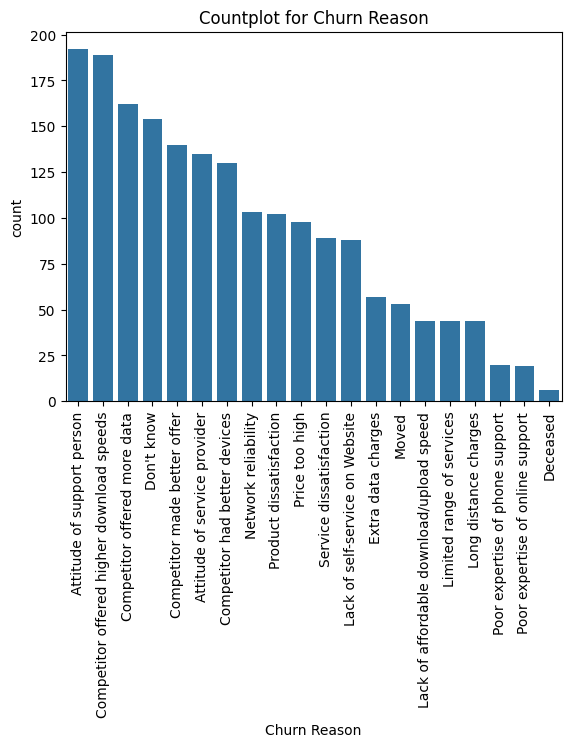

In [108]:
ax = sns.countplot(data=df, x='Churn Reason', order=df['Churn Reason'].value_counts().index)
ax.set_title('Countplot for Churn Reason')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

* Recode the 'Churn Reason' variable into 'Main Reason'


In [109]:
df['Churn Reason'].fillna('Not Applicable', inplace=True)

def categorize_reason(reason):
    if reason=='Not Applicable':
        return np.nan
    elif reason.split(' ')[0]=='Competitor':
        return 'Competition'
    elif reason.split(' ')[-1]=='dissatisfaction':
        return 'Dissatisfaction'
    elif (reason.split(' ')[0]=='Moved') | (reason.split(' ')[0]=='Deceased'):
        return 'Need'
    elif (reason.split(' ')[0]=='Price') | (reason.split(' ')[-1]=='charges'):
        return 'Price'
    elif (reason.split(' ')[0]=='Poor') | (reason.split(' ')[0]=='Attitude'):
        return 'Attitude'
    elif reason=="Don't know":
        return 'Others'
    else:
        return 'Product'



df['Main Reason'] = df['Churn Reason'].apply(lambda x : categorize_reason(str(x)))

df['Main Reason'].unique()

/tmp/ipython-input-256/2126832624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn Reason'].fillna('Not Applicable', inplace=True)


array(['Competition', 'Need', 'Price', 'Dissatisfaction', 'Product',
       'Others', 'Attitude', nan], dtype=object)

* New distribution of churn reasons:


In [110]:
df1 = df['Main Reason'].value_counts().reset_index()
df1.rename(columns={'index':'Main Reason', 'Main Reason':'count'}, inplace=True)
df1

,count,count
0,Competition,621
1,Attitude,366
2,Product,279
3,Price,199
4,Dissatisfaction,191
5,Others,154
6,Need,59


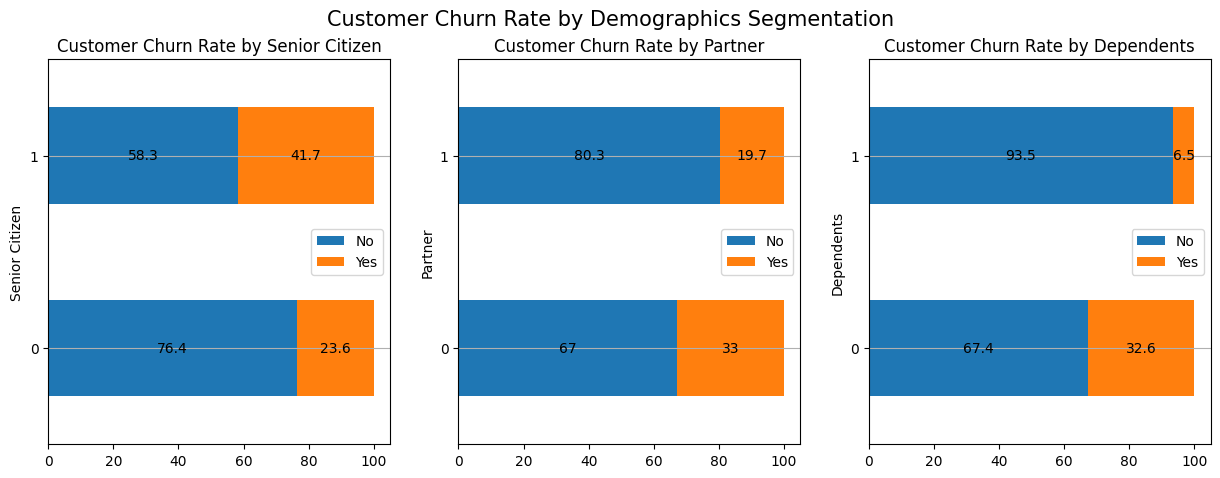

In [111]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Customer Churn Rate by Demographics Segmentation', fontsize=15)

demo = ['Senior Citizen', 'Partner', 'Dependents']

for i, col in enumerate(demo, start=0):
    df1 = df.groupby([col, 'Churn Label']).size().unstack()
    df1.apply(lambda x : round((x/x.sum())*100,1), axis=1).plot(kind='barh', stacked=True, ax=ax[i])
    ax[i].set_title('Customer Churn Rate by {}'.format(col))
    ax[i].legend(loc='best')
    ax[i].grid(axis='y')
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='center')


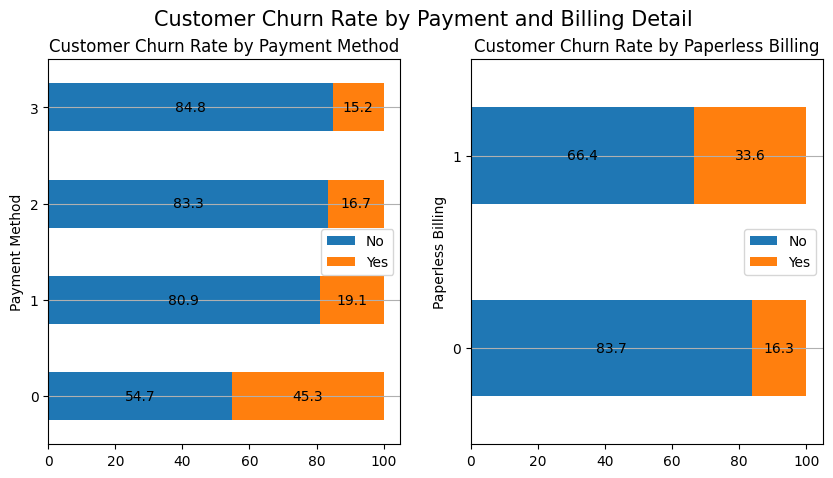

In [112]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Customer Churn Rate by Payment and Billing Detail', fontsize=15)

bill = ['Payment Method', 'Paperless Billing']

for i, col in enumerate(bill, start=0):
    df1 = df.groupby([col, 'Churn Label']).size().unstack()
    df1.apply(lambda x : round((x/x.sum())*100,1), axis=1).plot(kind='barh', stacked=True, ax=ax[i])
    ax[i].set_title('Customer Churn Rate by {}'.format(col))
    ax[i].legend(loc='best')
    ax[i].grid(axis='y')
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='center')

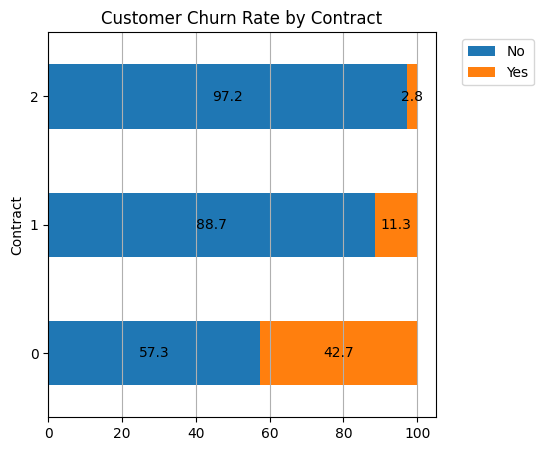

In [113]:
df1 = df.groupby(['Contract', 'Churn Label']).size().unstack()
ax = df1.apply(lambda x : round((x/x.sum()*100),1), axis=1).plot(kind='barh', stacked=True, figsize=(5,5))
plt.title('Customer Churn Rate by Contract')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='x')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

* Distribution of target variables


Text(0.5, 1.0, 'Count Plot of Churn Value')

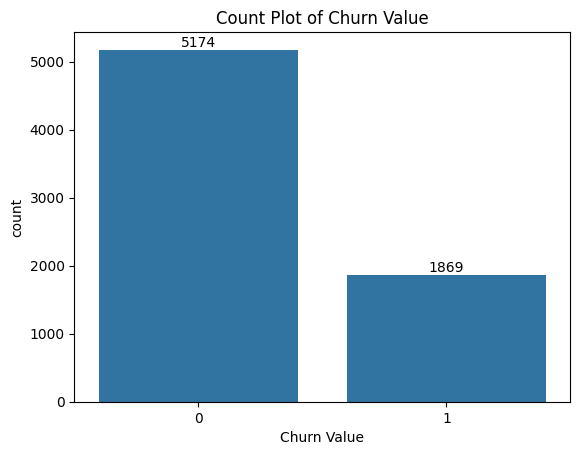

In [114]:
ax = sns.countplot(data=df, x='Churn Value')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Count Plot of Churn Value')


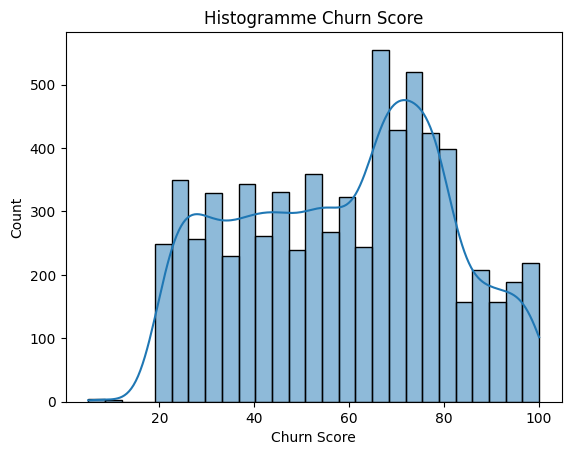

In [115]:
sns.histplot(df['Churn Score'], kde=True)
plt.title('Histogramme Churn Score');

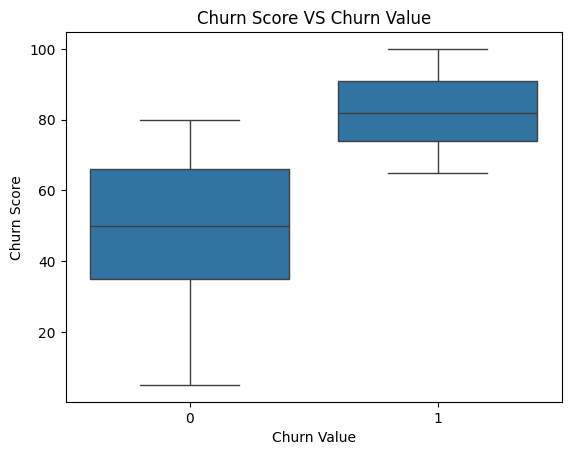

In [116]:
sns.boxplot(data = df, x='Churn Value', y ='Churn Score')
plt.title("Churn Score VS Churn Value");

* Correlation matrix:


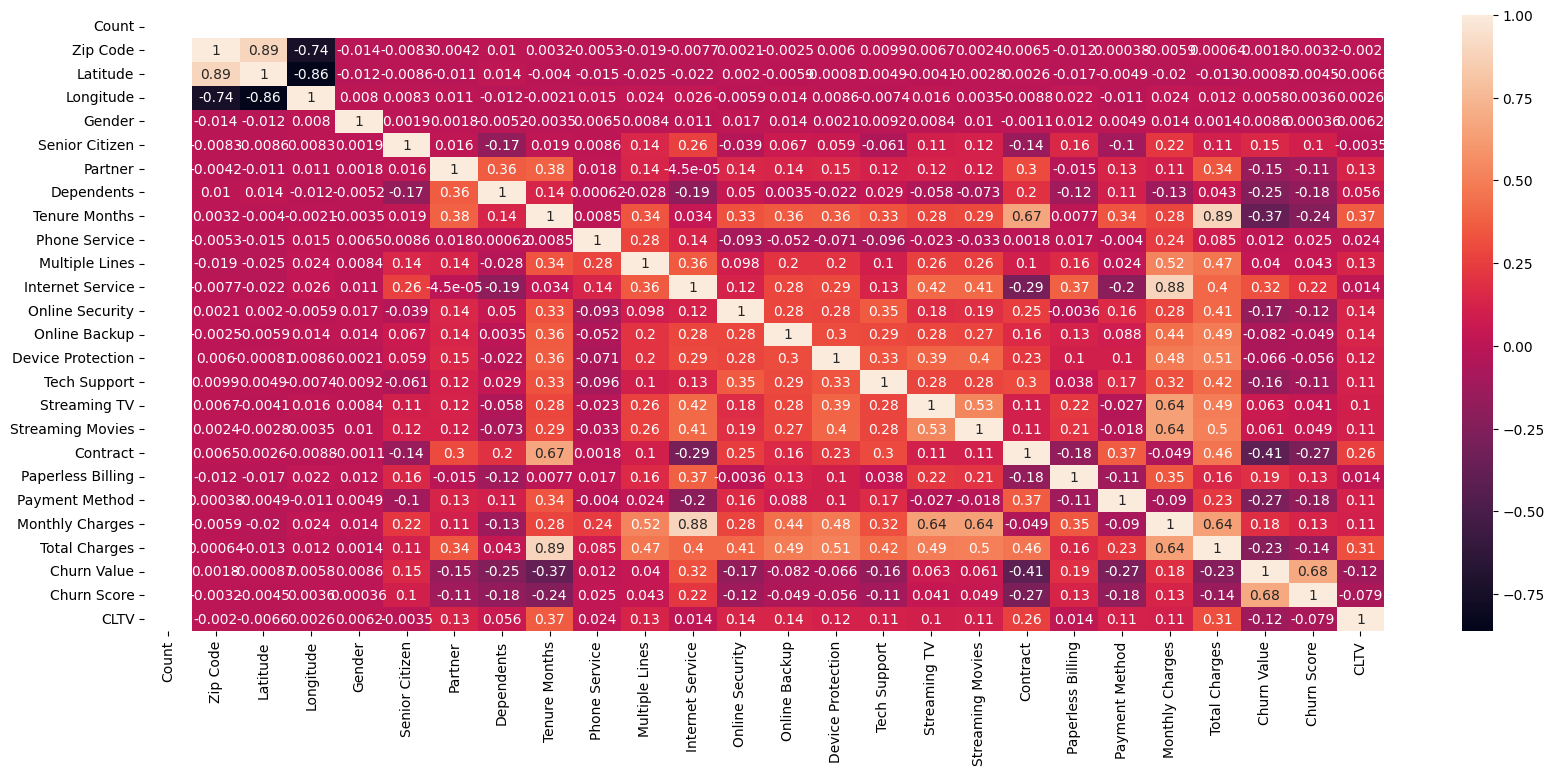

In [117]:
plt.figure(figsize=(20,8))
corr_matrix = df.corr('spearman', numeric_only=True)
sns.heatmap(corr_matrix, cbar=True, annot=True);

## Regression model

Let's start with a regression model to predict the **'Churn Score'** variable.


### Data preparation

* Remove variables that are useless or directly linked to the target variable


In [118]:
reg_df = df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude','Churn Label', 'Churn Value', 'Churn Reason', 'Main Reason'], axis=1)

* Prepare the training and test sets


In [119]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


X = reg_df.copy()
y = X.pop('Churn Score')


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train the model and compute the scores


Random forest regressor
https://www.youtube.com/watch?v=X1MRbEnEq2s

Given customer characteristics, the model is trained predicts how much value (or score) this customer will have.

In [120]:
rf = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators= 100)

rf.fit(X_train,y_train)

predicts_rf_train = rf.predict(X_train)
predicts_rf = rf.predict(X_test)

print("Training data scores")
print("Random Forest model R2 : {}".format(r2_score(y_train, predicts_rf_train)))
print("MAE du modèle RF : {}".format(mean_absolute_error(y_train, predicts_rf_train)))
print("RMSE du modèle RF : {}".format(np.sqrt(mean_squared_error(y_train, predicts_rf_train))))

print("\n Scores sur données de test")
print("Random Forest model R2 : {}".format(r2_score(y_test, predicts_rf)))
print("MAE du modèle RF : {}".format(mean_absolute_error(y_test, predicts_rf)))
print("RMSE du modèle RF : {}".format(np.sqrt(mean_squared_error(y_test, predicts_rf))))


Training data scores
Random Forest model R2 : 0.43009334991814807
MAE du modèle RF : 13.531477248530294
RMSE du modèle RF : 16.179267598614956

 Scores sur données de test
Random Forest model R2 : 0.11064347329803415
MAE du modèle RF : 17.11874426756688
RMSE du modèle RF : 20.635302155145972


## 🧠 1. Training vs Test Data (VERY IMPORTANT)

We evaluated the model on two different datasets:

- **Training data** → data used to learn  
- **Test data** → unseen data (real performance)

👉 The comparison between them is the key to understanding model quality.

---

## 📊 Training Data Scores

### ✅ R² (Coefficient of Determination)

Measures how much variance the model explains.

- **1.0** → perfect prediction  
- **0.0** → same as predicting the mean  
- **< 0** → worse than a baseline model  

👉 **R² = 0.43** means:

- ✅ The model explains about **43% of variability** in training data  
- ⚠️ This corresponds to a **moderate fit**

---

### ✅ MAE — Mean Absolute Error

Average prediction error.

**MAE ≈ 13.6**

👉 On average, predictions are off by about **13.6 units**.

---

### ✅ RMSE — Root Mean Squared Error

Similar to MAE but penalizes large errors more strongly.

**RMSE ≈ 16.3**

👉 This indicates the presence of some **large prediction errors**.

---

## 📊 Test Data Scores (THE REAL RESULT)

---

## 🚨 Key Observation

| Metric | Train | Test |
|---|---|---|
| R² | 0.43 | 0.11 |
| MAE | 13.6 | 16.8 |
| RMSE | 16.3 | 20.2 |

👉 Performance drops significantly on test data.

---

## 🔥 Interpretation: Overfitting

Your model:

- ✅ learns patterns in the training data  
- ❌ does **not generalize well** to new unseen data  

This is a classic case of **overfitting**.

The Random Forest is likely capturing noise or dataset-specific patterns rather than true underlying relationships.

---

## 🧩 How to Explain This

> The model performs reasonably well on training data but poorly on unseen data.  
> This gap indicates **overfitting**: the model memorizes training examples instead of learning generalizable relationships.


> What do these scores mean? How should we interpret them?
>
> Metrics such as **R²** or **RMSE** are useful to compare models with each other.  
> However, interpreting them in absolute terms to judge a model “by itself” is often harder:
>
> - **R²** is mainly designed for linear regression models. For non-linear models (e.g., random forests), relationships are not linear, which can make R² less intuitive or less relevant.
> - **R²**, like **RMSE**, can be strongly influenced by outliers.
> - A high **R²** does not always distinguish a well-fitted model from an overfitted one (overfitting) on the training data.
>
> *A first way to assess model usefulness is to compare it to simple baselines (“benchmark” or “naive” models):*


In [121]:
# Compute metrics for a naive baseline model (mean on the training dataset)
y_pred = np.ones(len(y_test))*y_train.mean()
print("Naive baseline (mean) R2 : {}".format(round(r2_score(y_test, y_pred),2)))
print("Naive baseline (mean) MAE : {}".format(round(mean_absolute_error(y_test, y_pred),2)))
print("RMSE du modèle naïf moyenne : {}".format(round(np.sqrt(mean_squared_error(y_test, y_pred)),2)))


Naive baseline (mean) R2 : -0.0
Naive baseline (mean) MAE : 18.68
RMSE du modèle naïf moyenne : 21.89


In [122]:
# Compute metrics for a naive baseline model (mean by Contract on the training dataset)
y_pred = reg_df.loc[y_test.index,:].groupby('Contract')['Churn Score'].transform('mean')
print("Naive baseline (mean) R2 contrat : {}".format(round(r2_score(y_test, y_pred),2)))
print("Naive baseline (mean) MAE contrat : {}".format(round(mean_absolute_error(y_test, y_pred),2)))
print("RMSE du modèle naïf moyenne contrat : {}".format(round(np.sqrt(mean_squared_error(y_test, y_pred)),2)))


Naive baseline (mean) R2 contrat : 0.08
Naive baseline (mean) MAE contrat : 17.6
RMSE du modèle naïf moyenne contrat : 21.03


### Results analysis

> In online challenges, education, and research, once a model has been trained, the common tendency is to evaluate it using standard metrics and to optimize those metrics until the best possible score is reached.
>
> When a single metric is used to judge your model, getting an excellent score on the test set often marks the end of the optimization process.
>
> In practice, it is important to examine your model carefully—both the correct predictions and the errors—even if you obtain a good metric. A model can score well yet behave in a way that does not make sense for your real problem, preventing you from answering business questions or making reliable interpretations and recommendations.
>
> Good error analysis also helps you identify the classes and/or variables for which the model behaves incorrectly.
>
> Different types of errors exist:
> - **Bias errors:** bias in the training set; the model will fail to make good predictions for certain groups.
> - **Variance errors:** the model fails to generalize; predictions on unseen data are poor.
> - **Noise errors:** random fluctuations in the data/model.
> - **Labeling errors:** incorrect or inconsistent labels.
> - **Conceptual errors:** poor generalization with many outliers or points outside the training distribution.


* Plot a scatter plot comparing predicted values to true values.


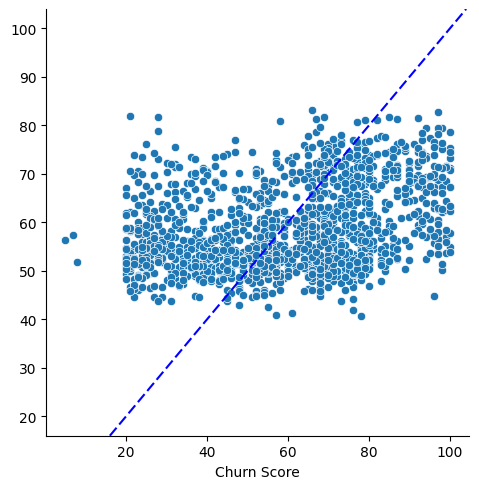

In [123]:
g = sns.relplot(x=y_test,y=predicts_rf)
g.ax.axline(xy1=(20, 20), xy2=(100,100), color="b", dashes=(5, 2));

> Possible interpretations of this plot:
>
> **Spread around the parity line:** The points are fairly evenly distributed around the parity line (the dotted blue diagonal), suggesting the model has reasonable predictive accuracy. However, there is substantial spread, indicating variability in prediction errors.
>
> **Systematic bias:** Values below ~60 tend to be systematically overestimated. Above 60, most churn scores are underestimated by the model.
>
> **Residual variance:** Residual variance appears relatively constant (homoscedasticity) because the spread does not change drastically across the range of values. There may be a slight increase in spread at higher values, which would require further analysis.
>
> **Outliers:** A few points are far from the parity line, indicating outliers or particularly large prediction errors. It is useful to analyze these cases to understand why the errors occur.


* Let's take a closer look at the residuals


In [124]:
result = pd.DataFrame()
y_pred = predicts_rf
result['y_test'] = y_test
result['y_pred'] = y_pred
result['residuals'] = result.y_test - result.y_pred


In [125]:
quantiles = result.residuals.quantile([0.1,0.25,0.75,0.9])


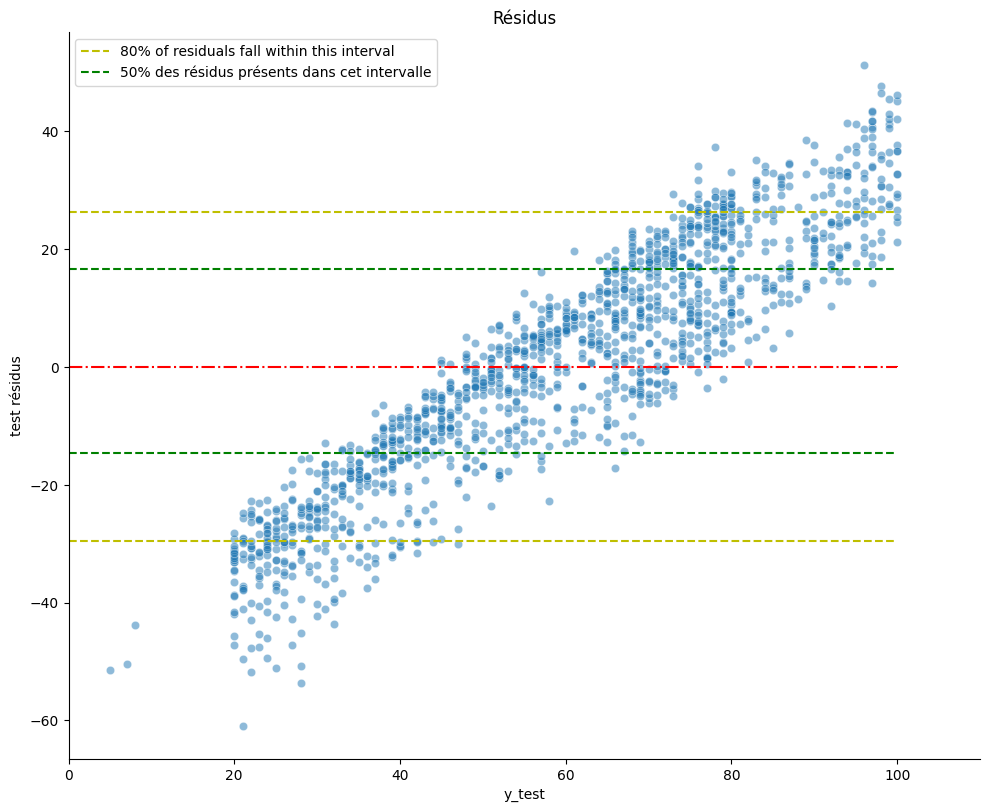

In [126]:
# Residual plot
sns.relplot(data=result, x='y_test', y='residuals', alpha=0.5, height=8, aspect=10/8)

plt.plot([0,result.y_test.max()], [0,0], 'r-.,')

plt.plot([0,result.y_test.max()], [quantiles[0.10],quantiles[0.10]], 'y--',
    label="80% of residuals fall within this interval")

plt.plot([0,result.y_test.max()],[quantiles[0.90], quantiles[0.90]], 'y--')

plt.plot([0,result.y_test.max()], [quantiles[0.25], quantiles[0.25]], 'g--',
        label="50% des résidus présents dans cet intervalle")
plt.plot([0,result.y_test.max()], [quantiles[0.75], quantiles[0.75]], 'g--')

plt.xlim(0,result.y_test.max()+10)

plt.xlabel('y_test')
plt.ylabel('test résidus')
plt.title("Résidus")
plt.legend()
plt.show();


* Analyze the absolute residual values


In [127]:
residuals = abs(y_test-predicts_rf)
residuals.name = 'Absolute residuals'


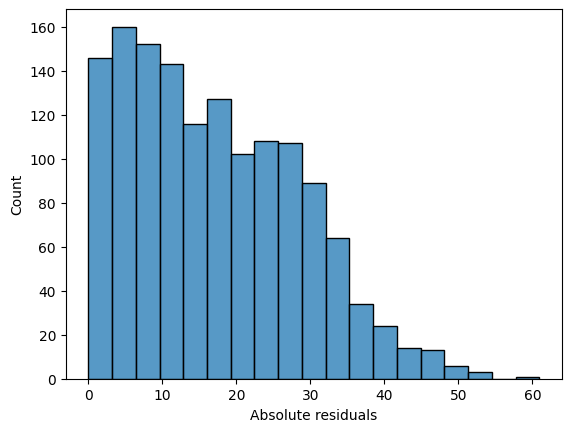

In [128]:
sns.histplot(residuals);


In [129]:
residuals.describe()


,Absolute residuals
count,1409.000000
mean,17.118744
std,11.526430
min,0.010922
25%,7.365579
50%,15.644465
75%,25.712048
max,60.910277


In [130]:
# Pourcentage d'observations ayant une erreur inférieure à 20
len(residuals[residuals<20])/len(residuals)


0.6174591909155429

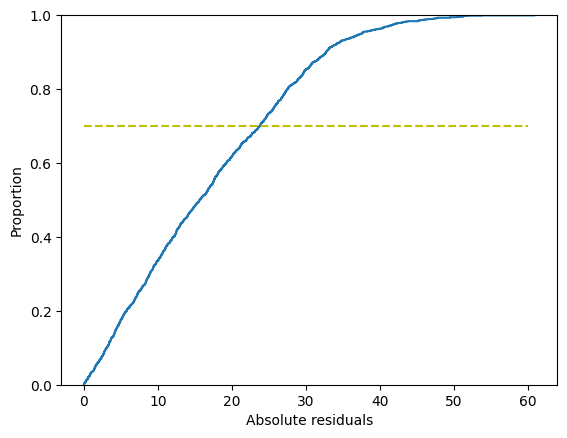

In [131]:
# The ECDF plot shows the Empirical Cumulative Distribution Function of a variable
sns.ecdfplot(residuals)
plt.plot([0,60],[0.7,0.7], 'y--')
plt.show();


* You can then compare the average error across different population groups:


In [132]:
# Is customer age related to the model's prediction difficulty?
residuals.to_frame().join(df['Senior Citizen']).groupby('Senior Citizen').mean()


,Absolute residuals
Senior Citizen,
0,17.106810
1,17.177169


In [133]:
# Is customer age related to the model's prediction difficulty?
residuals.to_frame().join(df['Contract']).groupby('Contract').mean()


,Absolute residuals
Contract,
0,17.746367
1,17.016877
2,15.724664


In [134]:
#Découpons le CLTV en 4 classes et comparons les erreurs pour chacune des classes

reg_df['CLTV_classes'] = pd.qcut(df['CLTV'],4, labels =[1,2,3,4])

residuals.to_frame().join(reg_df['CLTV_classes']).groupby('CLTV_classes').mean()


/tmp/ipython-input-256/2008762507.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  residuals.to_frame().join(reg_df['CLTV_classes']).groupby('CLTV_classes').mean()


,Absolute residuals
CLTV_classes,
1,17.858897
2,16.423757
3,17.345366
4,16.824255


---------------------------------------------------------------------------------------------

## Classification model

Let's create a binary classification model to predict the **'Churn Value'** variable.


### Data preparation

* Remove variables that are useless or directly linked to the target variable


In [135]:
classif_df = df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude','Churn Label', 'Churn Score', 'CLTV', 'Churn Reason', 'Main Reason'], axis=1)

classif_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int64  
 6   Multiple Lines     7043 non-null   int64  
 7   Internet Service   7043 non-null   int64  
 8   Online Security    7043 non-null   int64  
 9   Online Backup      7043 non-null   int64  
 10  Device Protection  7043 non-null   int64  
 11  Tech Support       7043 non-null   int64  
 12  Streaming TV       7043 non-null   int64  
 13  Streaming Movies   7043 non-null   int64  
 14  Contract           7043 non-null   int64  
 15  Paperless Billing  7043 non-null   int64  
 16  Payment Method     7043 

### Train the model and compute the scores


K-Fold Cross Validation, Stratified K-Fold, Leave-one-out Leave-P-Out Cross Validation:
https://www.youtube.com/watch?v=PF2wLKv2lsI

XGBClassifier
https://www.youtube.com/watch?v=Y0EJQFj0foo

we are not classifying. whether the person will quit or not

In [136]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay


X = classif_df.copy()
y = X.pop('Churn Value')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


#StandarScaler (inutile dans le cas d'un modèle à base d'arbres)
scaler = StandardScaler()
X_scaled_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_scaled_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


# Resampling des données d'entraînement dû au déséquilibre des données
X_scaled_train, y_train = SMOTE(sampling_strategy='minority').fit_resample(X_scaled_train, y_train)



In [137]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100)
xgb.fit(X_scaled_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [138]:
ypred = xgb.predict(X_scaled_test)
print(classification_report(y_test, ypred, labels=[0,1], target_names=['Non-churned [0]', 'Churned [1]']))


                 precision    recall  f1-score   support

Non-churned [0]       0.87      0.84      0.86      1035
    Churned [1]       0.60      0.66      0.63       373

       accuracy                           0.79      1408
      macro avg       0.74      0.75      0.74      1408
   weighted avg       0.80      0.79      0.80      1408



## 🧠 Predicting Customer Churn with XGBoost

The following line generates predictions using the trained XGBoost model:

```python
ypred = xgb.predict(X_scaled_test)



The model predicts whether each customer will:

0 → Non-churned (customer stays)

1 → Churned (customer leaves)

This is therefore a classification problem.


📊 Understanding the Classification Report

The classification report evaluates how well the model predicts each class.

✅ Precision

Precision answers:
When the model predicts a class, how often is it correct?

Non-churned: 0.89 → predictions are correct 89% of the time.

Churned: 0.62 → churn predictions contain more false alarms.

✅ Recall

Recall answers:
How many real cases did the model successfully detect?

Non-churned: detects 85% of loyal customers.

Churned: detects 70% of customers who actually churn.

In churn prediction, recall for churners is often very important.

✅ F1-Score

The F1-score balances precision and recall.

Non-churned customers: 0.87

Churned customers: 0.66

The model performs better at predicting customers who stay than those who leave.

✅ Support

Number of real examples in the test dataset:

Non-churned customers: 1035

Churned customers: 373

The dataset is imbalanced, meaning there are more non-churners than churners.

⭐ Overall Accuracy

Accuracy = 0.81

The model predicts correctly for 81% of customers overall.

However, accuracy alone can be misleading with imbalanced datasets.

🔥 Interpretation

The XGBoost classifier:

✅ predicts non-churning customers very well

⚠️ predicts churned customers moderately well

🚨 still misses about 30% of actual churners

Key lesson:
High accuracy does not necessarily mean good churn detection.
Precision and recall must also be evaluated.

> What do these metrics tell us?
>
> How good is the model performance?
>
> *Plot the confusion matrix and the ROC curve.*


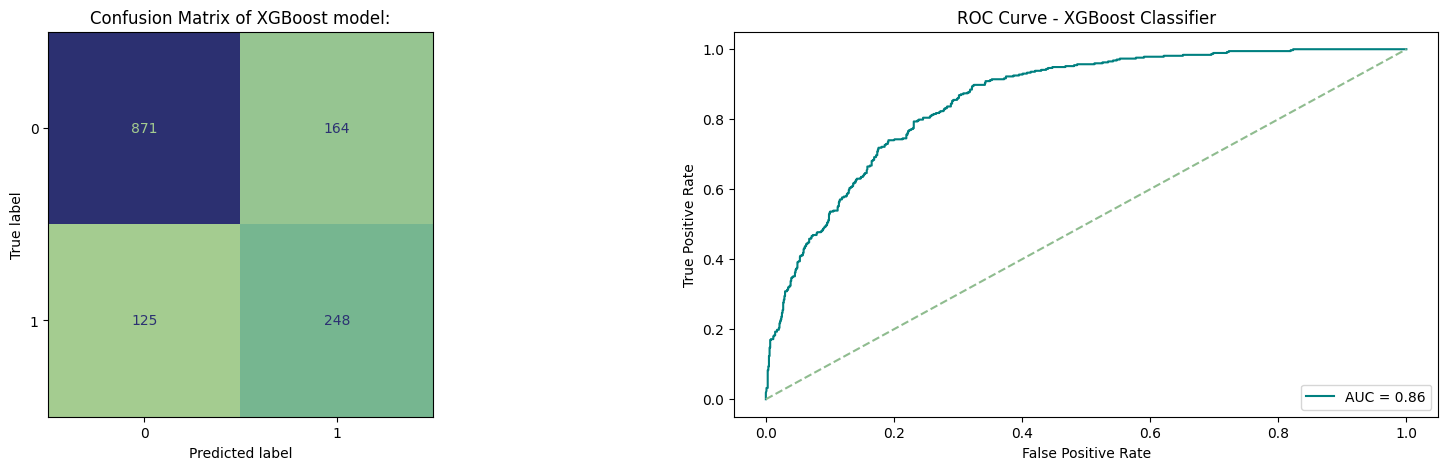

In [139]:
preds= xgb.predict_proba(X_scaled_test)

y_pred_score = preds[:,1]

fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of XGBoost model:')
ConfusionMatrixDisplay.from_predictions(y_test, ypred, colorbar=False, cmap='crest', ax=ax[0])
ax[0].grid(False)


# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_score)
roc_auc = auc(fpr, tpr)

ax[1].set_title('ROC Curve - XGBoost Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, c='teal')
ax[1].plot([0,1],[0,1],'--', c='darkseagreen')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate');

### Error analysis


In [140]:
# Sélection des mauvaises prédictions
bad_predictions = X_test[y_test!=ypred].join(y_test)

In [141]:
bad_predictions

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
11,0,0,0,1,5,1,0,2,0,0,0,0,0,0,0,1,0,69.70,316.90,1
12,0,0,0,1,34,1,1,2,0,1,1,0,1,1,0,1,0,106.35,3549.25,1
14,1,0,0,1,2,1,0,2,0,0,0,0,1,0,0,1,0,80.65,144.15,1
26,1,1,1,1,37,1,1,2,0,0,0,0,0,0,0,1,0,76.50,2868.15,1
39,0,1,1,0,58,0,0,1,0,1,1,0,0,1,0,1,0,45.30,2651.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,1,1,1,0,13,0,0,1,0,0,0,0,1,1,0,0,0,45.30,528.45,0
6830,0,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,0,55.90,238.50,0
6874,1,0,0,0,20,1,1,2,1,0,0,0,1,0,0,1,2,89.10,1879.25,0
6949,0,0,0,0,9,1,1,2,0,0,0,0,1,0,0,1,0,85.50,791.70,0


* Focus on contract types


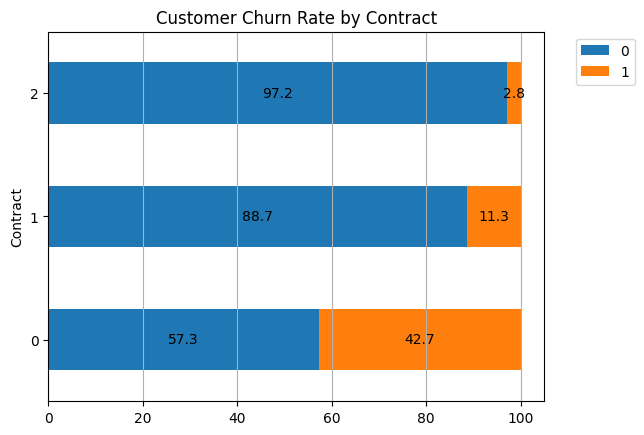

In [142]:
df1 = df.groupby(['Contract', 'Churn Value']).size().unstack()
ax = df1.apply(lambda x : round((x/x.sum()*100),1), axis=1).plot(kind='barh', stacked=True)
plt.title('Customer Churn Rate by Contract')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='x')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

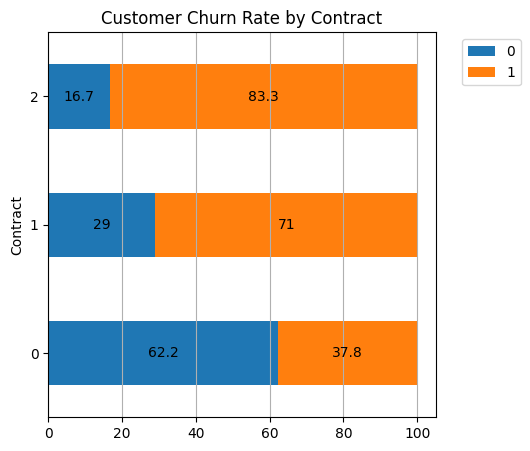

In [143]:
df1 = bad_predictions.groupby(['Contract', 'Churn Value']).size().unstack()
ax = df1.apply(lambda x : round((x/x.sum()*100),1), axis=1).plot(kind='barh', stacked=True, figsize=(5,5))
plt.title('Customer Churn Rate by Contract')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='x')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

> Churners on month-to-month contracts are harder for the model to identify.


* Let's examine differences by gender.


In [144]:
X_test['Gender'].value_counts(normalize=True)

,proportion
Gender,
1,0.505682
0,0.494318


In [145]:
bad_predictions['Gender'].value_counts(normalize=True)

,proportion
Gender,
1,0.508651
0,0.491349


* Show the proportions in the test set and in the misclassified predictions only.


In [146]:
results = pd.DataFrame()

for col in X_test.loc[:,X_test.nunique()<5].columns:
    # Calcul des proportions dans X_test
    vc_test = X_test[col].value_counts(normalize=True)

    # Calcul des proportions dans les mauvaises prédictions
    vc_bad_pred = bad_predictions[col].value_counts(normalize=True)

    # Préparation des résultats pour la variable courante
    result = pd.DataFrame({
        f'{col}_X_test': vc_test,
        f'{col}_bad_predictions': vc_bad_pred
    })

    display(pd.concat([results, result]))


,Gender_X_test,Gender_bad_predictions
Gender,,
1,0.505682,0.508651
0,0.494318,0.491349


,Senior Citizen_X_test,Senior Citizen_bad_predictions
Senior Citizen,,
0,0.829545,0.782007
1,0.170455,0.217993


,Partner_X_test,Partner_bad_predictions
Partner,,
0,0.520597,0.619377
1,0.479403,0.380623


,Dependents_X_test,Dependents_bad_predictions
Dependents,,
0,0.769886,0.930796
1,0.230114,0.069204


,Phone Service_X_test,Phone Service_bad_predictions
Phone Service,,
1,0.899148,0.892734
0,0.100852,0.107266


,Multiple Lines_X_test,Multiple Lines_bad_predictions
Multiple Lines,,
0,0.578835,0.577855
1,0.421165,0.422145


,Internet Service_X_test,Internet Service_bad_predictions
Internet Service,,
2,0.449574,0.591696
1,0.339489,0.307958
0,0.210938,0.100346


,Online Security_X_test,Online Security_bad_predictions
Online Security,,
0,0.726562,0.823529
1,0.273438,0.176471


,Online Backup_X_test,Online Backup_bad_predictions
Online Backup,,
0,0.644176,0.66782
1,0.355824,0.33218


,Device Protection_X_test,Device Protection_bad_predictions
Device Protection,,
0,0.65483,0.726644
1,0.34517,0.273356


,Tech Support_X_test,Tech Support_bad_predictions
Tech Support,,
0,0.703125,0.768166
1,0.296875,0.231834


,Streaming TV_X_test,Streaming TV_bad_predictions
Streaming TV,,
0,0.607244,0.574394
1,0.392756,0.425606


,Streaming Movies_X_test,Streaming Movies_bad_predictions
Streaming Movies,,
0,0.608665,0.557093
1,0.391335,0.442907


,Contract_X_test,Contract_bad_predictions
Contract,,
0,0.551136,0.851211
1,0.200994,0.107266
2,0.247869,0.041522


,Paperless Billing_X_test,Paperless Billing_bad_predictions
Paperless Billing,,
1,0.59446,0.688581
0,0.40554,0.311419


,Payment Method_X_test,Payment Method_bad_predictions
Payment Method,,
0,0.344460,0.494810
1,0.210938,0.176471
2,0.225852,0.173010
3,0.218750,0.155709


* Let's examine accuracy differences for each categorical variable:


In [147]:
X_test_with_predictions = X_test.copy()
X_test_with_predictions['TrueValue'] = y_test
X_test_with_predictions['Prediction'] = ypred

# Select categorical columns
categorical_columns = X_test.loc[:,X_test.nunique()<5].columns

# Function to compute rates
def calculate_accuracy_rates(df, col, true_col, pred_col):
    # Calculer le taux de bonnes et de mauvaises prédictions pour chaque catégorie
    accuracy_rates = df.groupby(col).apply(
        lambda x: pd.Series({
            'Accuracy': (x[true_col] == x[pred_col]).mean(),
        })
    )
    return accuracy_rates

# Calculer et afficher les taux pour chaque variable catégorielle
for col in categorical_columns:
    rates = calculate_accuracy_rates(X_test_with_predictions, col, 'TrueValue', 'Prediction')
    print(f"Taux pour la variable '{col}':\n{rates}\n")


Taux pour la variable 'Gender':
        Accuracy
Gender          
0       0.795977
1       0.793539

Taux pour la variable 'Senior Citizen':
                Accuracy
Senior Citizen          
0               0.806507
1               0.737500

Taux pour la variable 'Partner':
         Accuracy
Partner          
0        0.755798
1        0.837037

Taux pour la variable 'Dependents':
            Accuracy
Dependents          
0           0.751845
1           0.938272

Taux pour la variable 'Phone Service':
               Accuracy
Phone Service          
0              0.781690
1              0.796209

Taux pour la variable 'Multiple Lines':
                Accuracy
Multiple Lines          
0               0.795092
1               0.794266

Taux pour la variable 'Internet Service':
                  Accuracy
Internet Service          
0                 0.902357
1                 0.813808
2                 0.729858

Taux pour la variable 'Online Security':
                 Accuracy
Online Se

/tmp/ipython-input-256/913346020.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_rates = df.groupby(col).apply(
/tmp/ipython-input-256/913346020.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_rates = df.groupby(col).apply(
/tmp/ipython-input-256/913346020.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

* It is also useful to analyze low-confidence predictions to identify examples where the model struggles to decide.


In [148]:
X_test[(y_pred_score>0.5) & (y_pred_score<0.65) & (y_test==1)].join(df['Main Reason'])

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Main Reason
1,1,0,0,1,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,Need
56,0,0,0,0,2,1,1,1,0,1,0,0,0,0,0,1,1,54.40,114.10,Price
71,0,0,1,0,18,1,0,2,0,0,1,0,1,1,0,0,1,95.15,1779.95,Others
120,1,0,0,0,15,1,0,2,0,0,0,0,0,0,0,0,2,69.00,994.80,Competition
140,0,0,0,0,32,1,1,2,0,1,0,0,0,0,0,1,2,80.35,2596.15,Competition
149,0,0,1,0,9,0,0,1,0,1,0,0,0,0,0,1,0,29.95,248.95,Competition
155,0,1,1,0,56,1,1,2,1,0,1,0,1,1,1,1,2,104.55,5794.65,Competition
162,1,0,0,0,3,1,0,2,0,0,0,0,0,0,0,1,2,69.55,222.30,Competition
185,1,0,0,0,15,1,0,2,0,1,0,0,0,1,0,1,2,85.90,1269.55,Others
215,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,50.80,50.80,Competition


Now check different models

In [149]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_scaled_train, y_train)

ypred_logreg = logreg.predict(X_scaled_test)

In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred_logreg))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1035
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1408
   macro avg       0.73      0.78      0.73      1408
weighted avg       0.82      0.76      0.77      1408



In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, ypred_logreg),
        accuracy_score(y_test, ypred)
    ],
    "Precision (Churn)": [
        precision_score(y_test, ypred_logreg),
        precision_score(y_test, ypred)
    ],
    "Recall (Churn)": [
        recall_score(y_test, ypred_logreg),
        recall_score(y_test, ypred)
    ],
    "F1-score (Churn)": [
        f1_score(y_test, ypred_logreg),
        f1_score(y_test, ypred)
    ]
})

results

,Model,Accuracy,Precision (Churn),Recall (Churn),F1-score (Churn)
0,Logistic Regression,0.759233,0.529210,0.825737,0.645026
1,XGBoost,0.794744,0.601942,0.664879,0.631847


MLP Classification report:

                 precision    recall  f1-score   support

Non-churned [0]       0.89      0.75      0.81      1035
    Churned [1]       0.52      0.74      0.61       373

       accuracy                           0.75      1408
      macro avg       0.70      0.75      0.71      1408
   weighted avg       0.79      0.75      0.76      1408



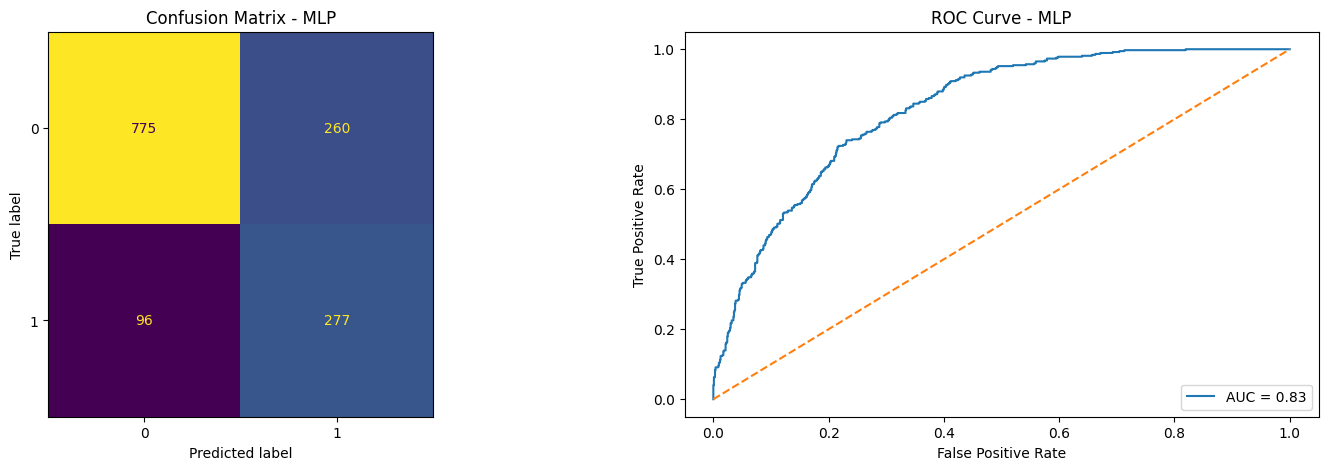

In [152]:
# --- Small MLP (Neural Network) for churn classification ---

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# 1) Define a small MLP
# - early_stopping uses an internal validation split from training data
# - alpha = L2 regularization
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-3,
    max_iter=300,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=15,
    random_state=42
)

# 2) Train on the same preprocessed data you already built:
#    X_scaled_train, y_train come from StandardScaler + SMOTE
mlp.fit(X_scaled_train, y_train)

# 3) Predict on test
ypred_mlp = mlp.predict(X_scaled_test)
yproba_mlp = mlp.predict_proba(X_scaled_test)[:, 1]

print("MLP Classification report:\n")
print(classification_report(y_test, ypred_mlp, target_names=["Non-churned [0]", "Churned [1]"]))

# 4) Confusion Matrix + ROC curve
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].set_title("Confusion Matrix - MLP")
ConfusionMatrixDisplay.from_predictions(y_test, ypred_mlp, colorbar=False, ax=ax[0])
ax[0].grid(False)

fpr, tpr, _ = roc_curve(y_test.values, yproba_mlp)
roc_auc = auc(fpr, tpr)

ax[1].set_title("ROC Curve - MLP")
ax[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
ax[1].plot([0, 1], [0, 1], "--")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend(loc="lower right")

plt.show()

📊 Interpretation of the Classification Report

The model predicts two classes:

0 → Non-churned (customer stays)

1 → Churned (customer leaves)

✅ Non-churned customers [0]

Precision = 0.89

When the model predicts “this customer will NOT churn”, it is correct 89% of the time.

Recall = 0.75

Among all customers who actually stayed, the model correctly identifies 75% of them.

F1-score = 0.81

Overall performance for this class is strong and balanced.

👉 Interpretation

The model is reliable when predicting customers who stay.
However, it still misses about 25% of real non-churners, incorrectly flagging them as churn risks.

⚠️ Churned customers [1]

Precision = 0.52

When the model predicts “this customer WILL churn”, it is correct only 52% of the time.

➡️ This means many false alarms (false positives).

Recall = 0.74

Among all customers who actually churned, the model detects 74% of them.

➡️ The model successfully finds most churners.

F1-score = 0.61

Moderate performance: recall is good, but precision remains limited.

👉 Interpretation

The model behaves like a churn detector:

✅ Good at identifying customers at risk

⚠️ But about half of churn alerts are incorrect

📈 Overall Model Performance
Accuracy = 0.75

The model makes correct predictions for 75% of customers overall.

⚠️ Accuracy alone can be misleading because the dataset is imbalanced
(more non-churners than churners).

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results_mlp = pd.DataFrame({
    "Model": ["MLP"],
    "Accuracy": [accuracy_score(y_test, ypred_mlp)],
    "Precision (Churn)": [precision_score(y_test, ypred_mlp)],
    "Recall (Churn)": [recall_score(y_test, ypred_mlp)],
    "F1-score (Churn)": [f1_score(y_test, ypred_mlp)]
})

display(pd.concat([results, results_mlp], ignore_index=True))

,Model,Accuracy,Precision (Churn),Recall (Churn),F1-score (Churn)
0,Logistic Regression,0.759233,0.529210,0.825737,0.645026
1,XGBoost,0.794744,0.601942,0.664879,0.631847
2,MLP,0.747159,0.515829,0.742627,0.608791


✅ What each model is good at
Logistic Regression

✔ Detects churners very well
✔ Highest Recall (0.83)
✔ Best F1-score

Meaning:

👉 Finds most customers who will leave

But:

⚠️ More false alarms (lower precision)

XGBoost

✔ Slightly higher overall accuracy
✔ Higher precision

Meaning:

👉 When it predicts churn, it is more often correct.

But:

❌ Misses many churners.

🔥 The Key Insight (important teaching moment)

👉 Higher accuracy does NOT mean better churn model.

Why?

Because the dataset is imbalanced (many non-churners).

A model can increase accuracy simply by predicting stay more often.

⭐ Business Interpretation
If goal = customer retention

Choose:

✅ Logistic Regression

Because:

it detects 82% of churners

fewer customers leave unnoticed

If goal = reduce intervention costs

Choose:

✅ XGBoost

Because:

fewer false churn alerts

marketing actions more targeted

🧩 The surprising lesson

A simple model (Logistic Regression) can outperform an advanced model (XGBoost) depending on the objective.

This is a classic machine learning insight.

* Lift curve / Cumulative gains

The lift curve helps you select a percentage of observations with the highest probability of belonging to the class of interest, and shows how many elements of that class you can capture.

For example, in the curve below, we can see that by selecting the top 20% of observations by predicted probability, more than 50% of churners are included. In theory, selecting 20% of observations at random would capture only 20% of churners—so the model increases the chance of targeting a churner by about 2.5×.


> To go further, you can compute model precision as a function of the chosen probability threshold.
>
> If the model behaves as expected, increasing the probability threshold increases precision (but decreases the sample size). Depending on your goals, this can be very useful information.


> To evaluate model relevance and incorporate business constraints, you can also create your own evaluation metric.
>
> Here, we have a score that represents the “value” of a customer for the company, so we can define a penalty function that weights model errors by customer value (CLTV).
>
> Example:
>
> $ penalty = \sum _{i=1}^{4999} penalty_i $
>
> where $penalty_i$ is computed as:
>
>$
penalty_i = \left\{
    \begin{array}{ll}
        0 & \mbox{if  } y_i = \hat{y}_i \\
        1 & \mbox{if  } \hat{y}_i = 1 \mbox{ and }  y_i = 0 \\
        CLTV_i & \mbox{if  } \hat{y}_i = 0  \mbox{ and } y_i = 1 \\
    \end{array}
\right.
$
>
> More generally, don’t hesitate to create metrics that compute the “cost” (financial or human, for example) of a model based on its predictions.
